# Loan Repayment - Exploratory Data Analysis
# This notebook explores the loan repayment dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('../data-files/loan_repayment.csv')

In [3]:
# Basic info
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None

Missing Values:
credit.policy        0
purp

In [4]:
# Create repayment percentage
df['percentage_repaid'] = 1 - df['not.fully.paid']

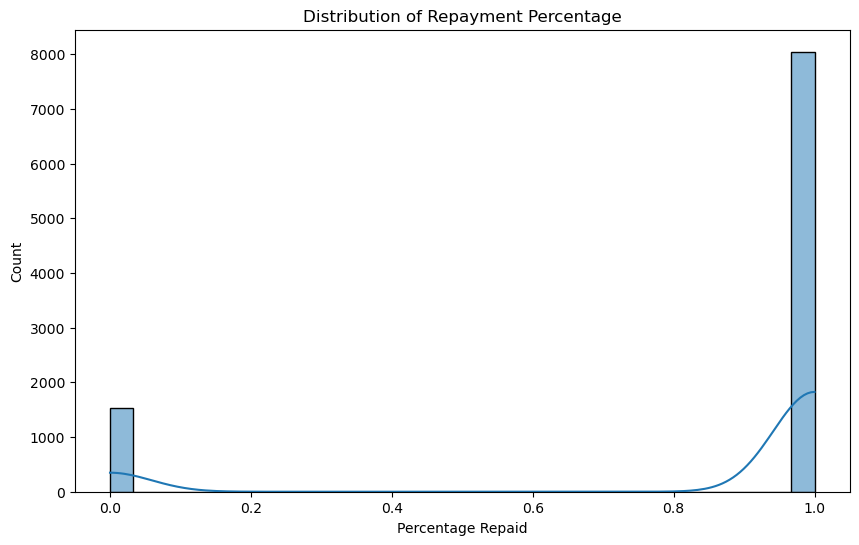

In [5]:
# Target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['percentage_repaid'], bins=30, kde=True)
plt.title("Distribution of Repayment Percentage")
plt.xlabel("Percentage Repaid")
plt.show()

In [6]:
# Numerical features analysis
num_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
           'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']

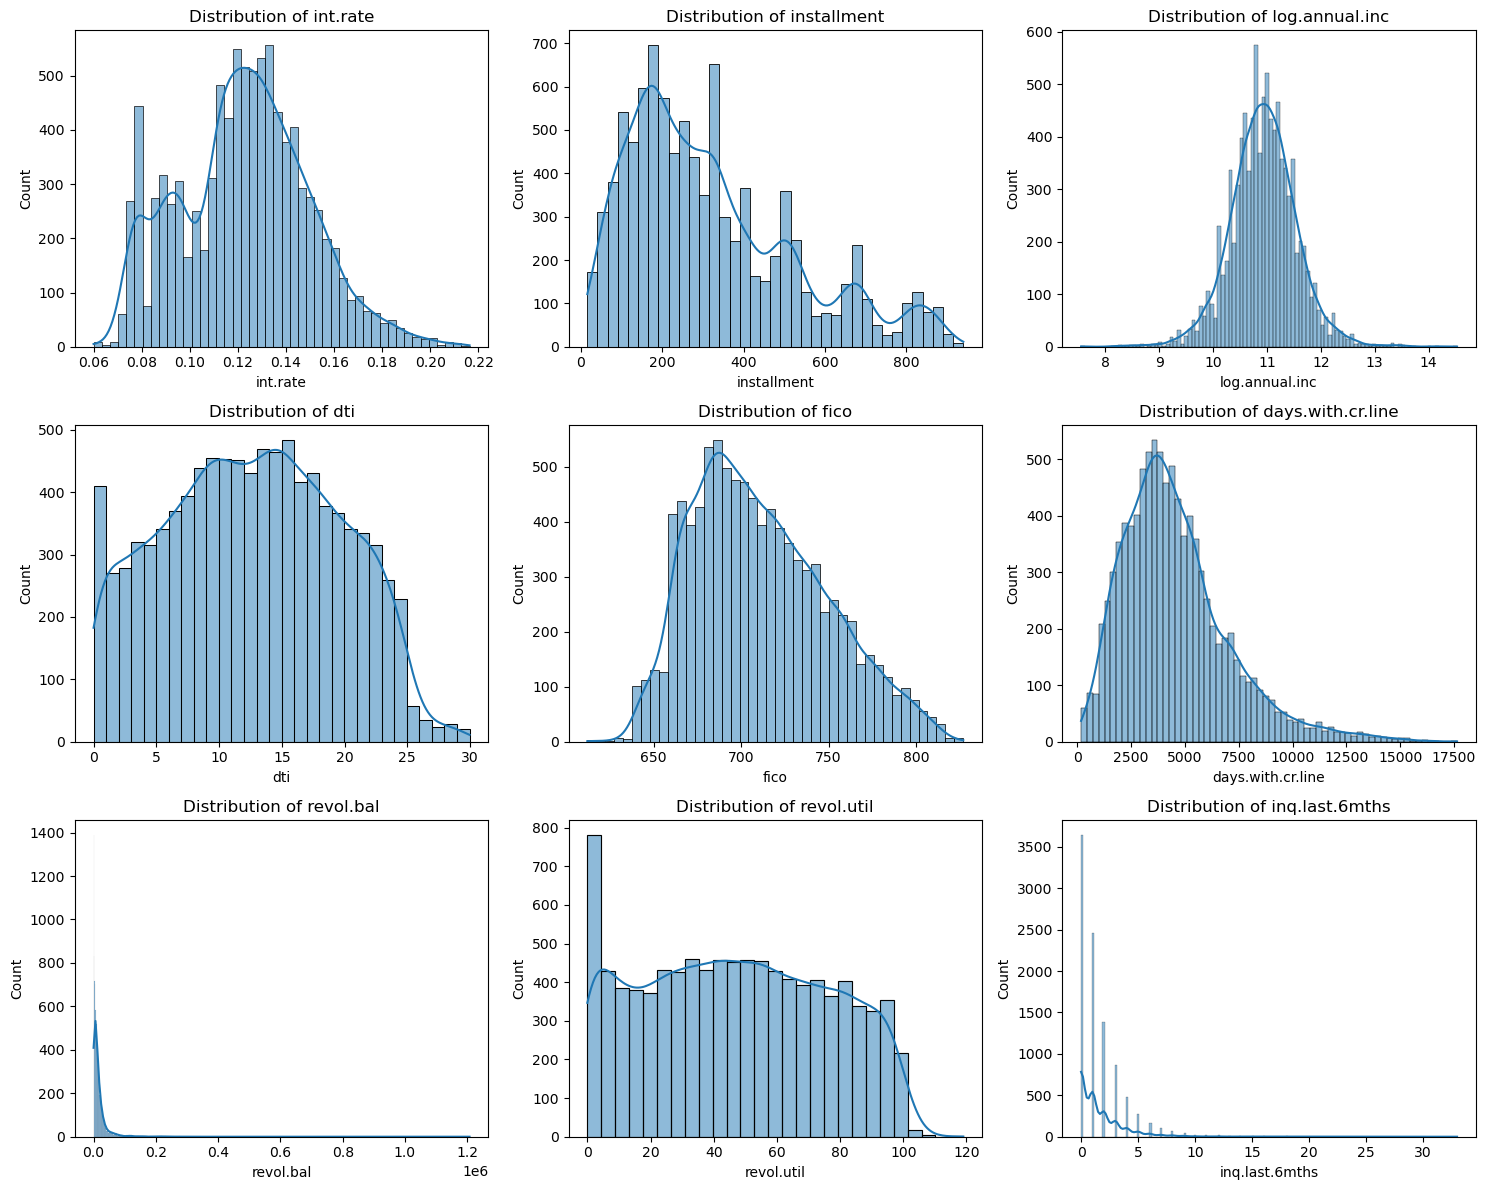

In [7]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [8]:
# Categorical features analysis
cat_cols = ['credit.policy', 'purpose', 'delinq.2yrs', 'pub.rec']

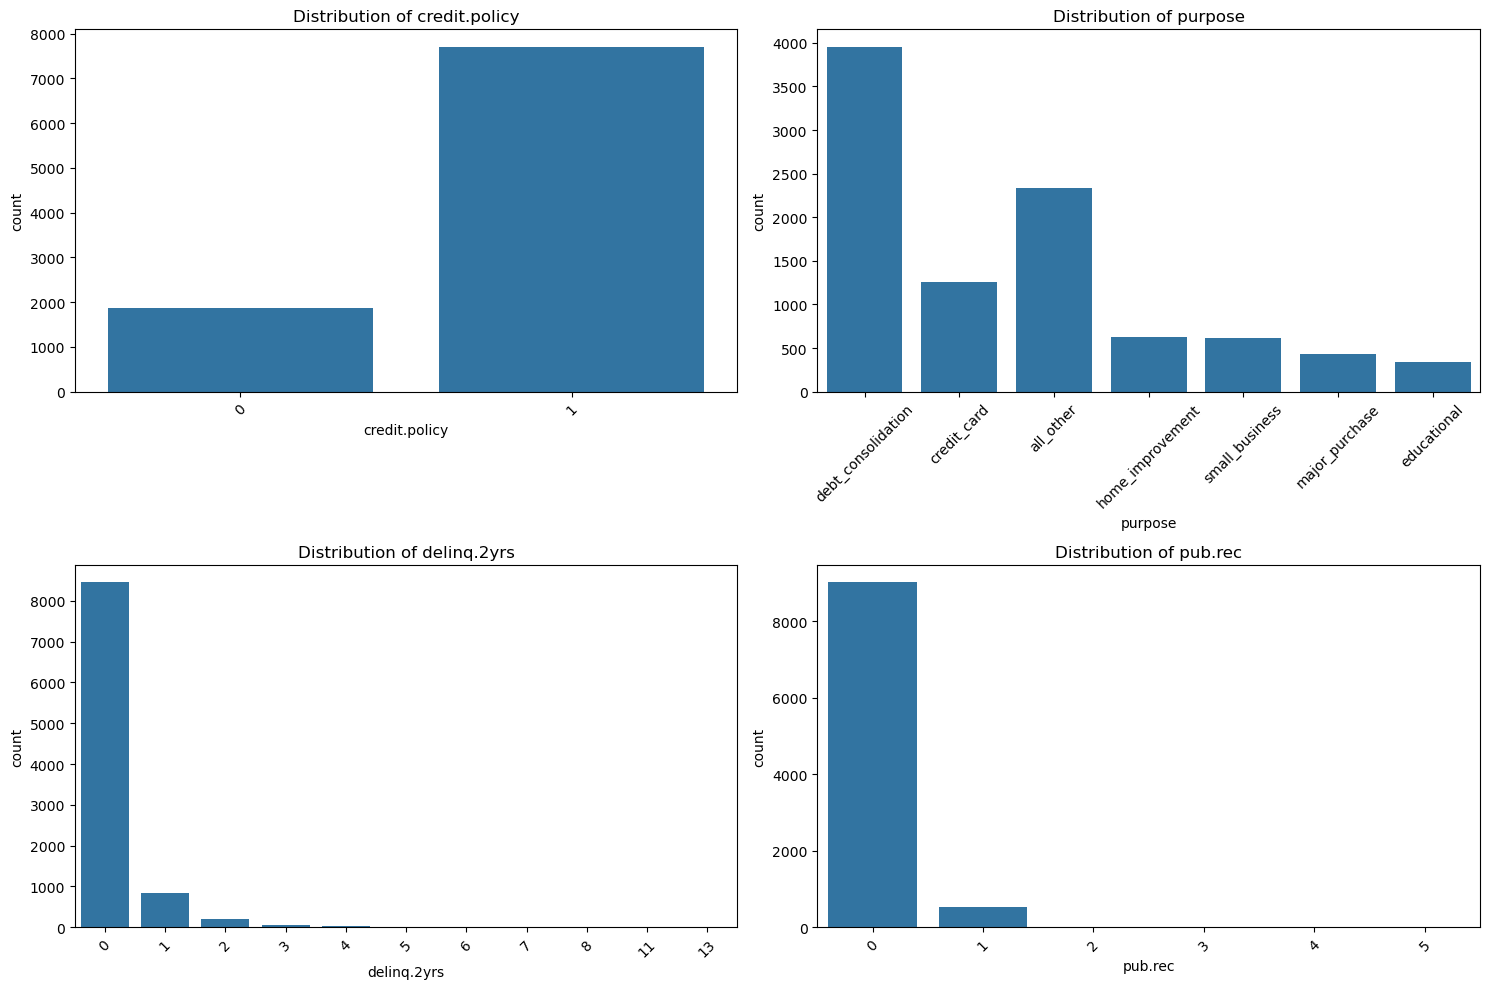

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

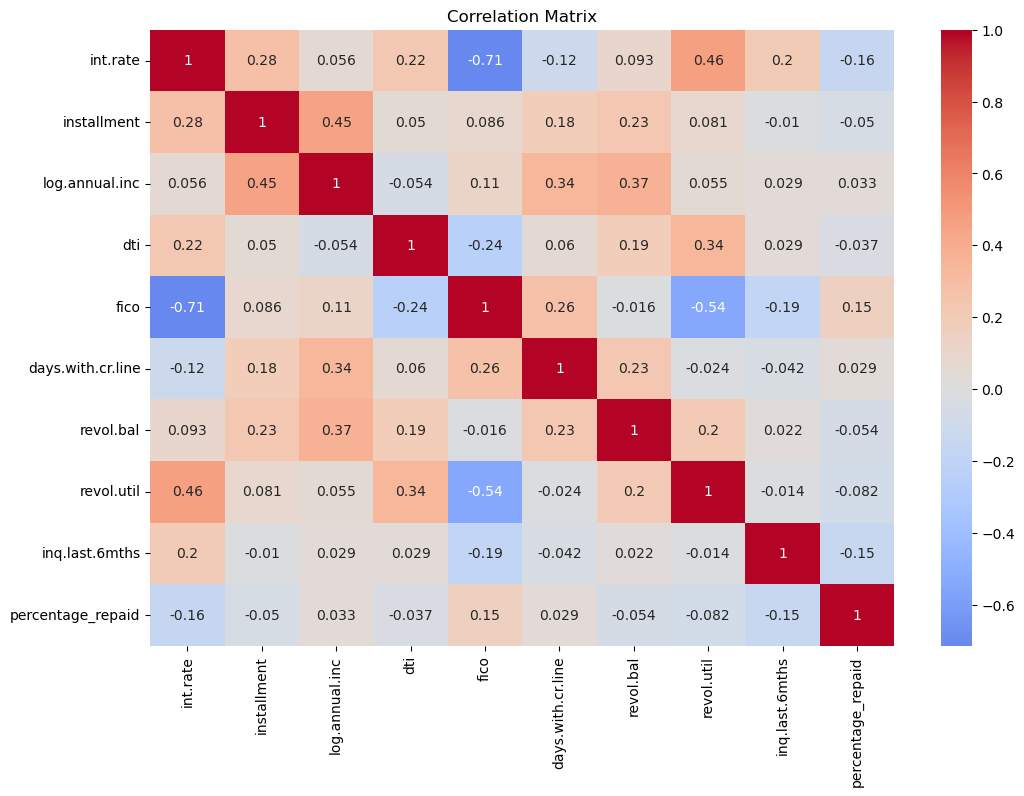

In [10]:
# Correlation matrix
corr = df[num_cols + ['percentage_repaid']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

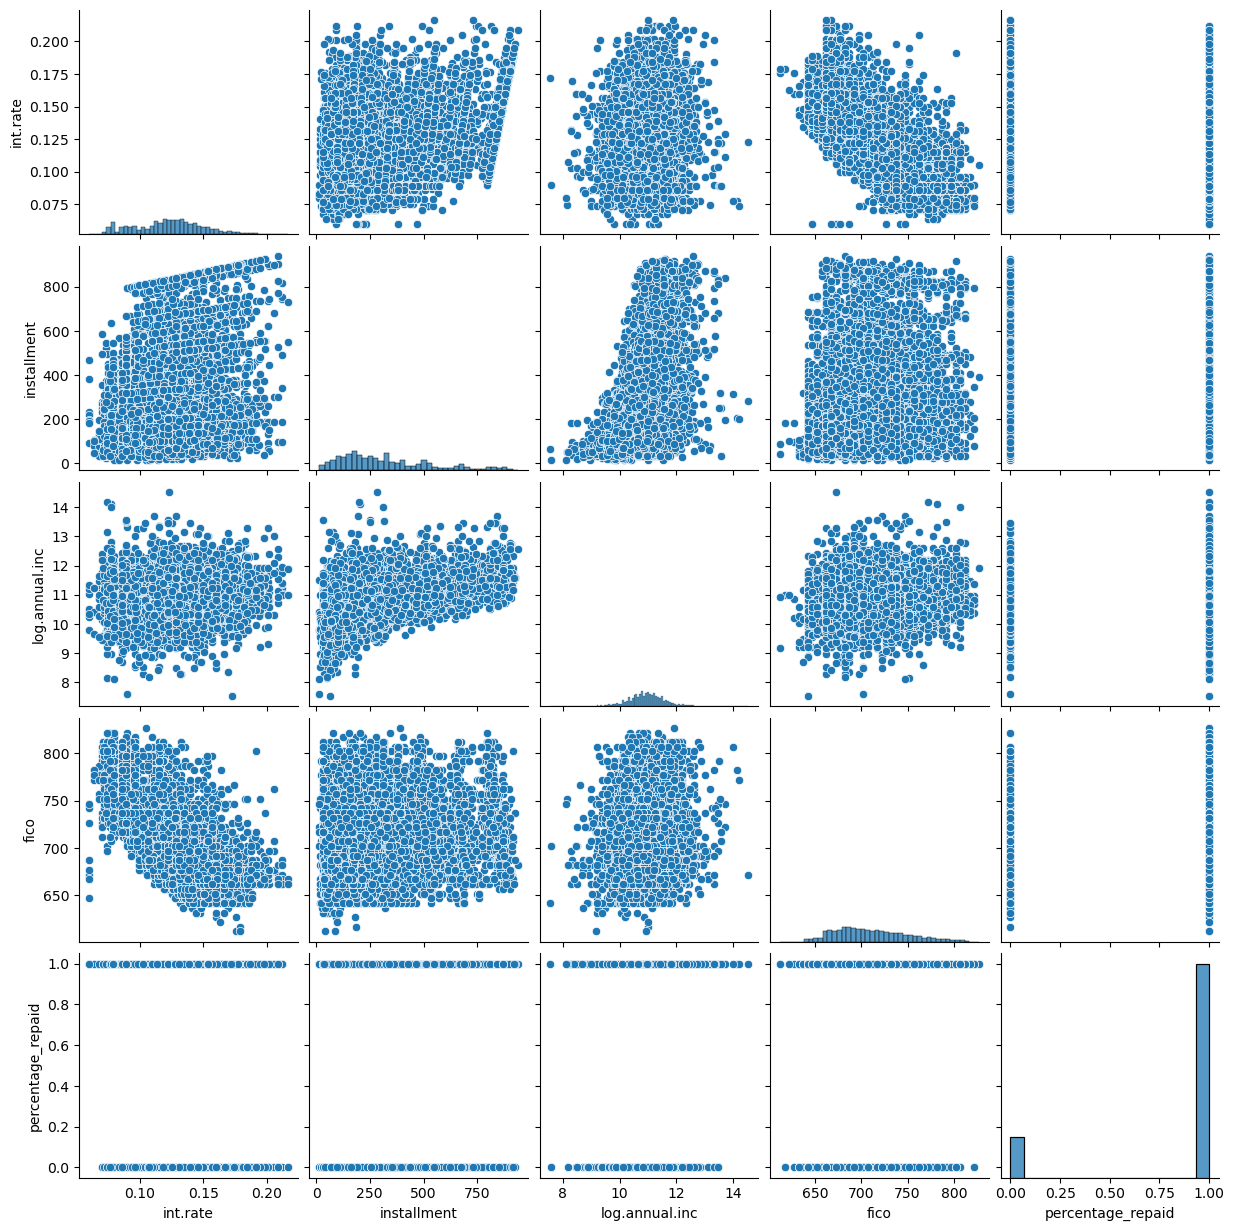

In [11]:
# Pairplot of key features
sns.pairplot(df[['int.rate', 'installment', 'log.annual.inc', 'fico', 'percentage_repaid']])
plt.show()